In [1]:
!pip install trimesh vedo pyglet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 11.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 740.3/740.3 kB 41.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 48.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.6/145.6 MB 6.8 MB/s eta 0:00:00
  Created wheel for vedo: filename=vedo-2026.6.1-py3-none-any.whl size=2823122 sha256=228e7d62b792407a3870d683925da9d8e292a84e246f28f0bde7534f5cd75986
  Stored in directory: /root/.cache/pip/wheels/a6/87/43/56603acbb1373aa7463afd2561478d00a6d5bb3aa40403938b
Successfully built vedo


In [2]:
import trimesh
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [11]:
from google.colab import drive
drive.mount('/content/drive')

import trimesh

path = "/content/drive/MyDrive/visual computing/model.glb"
mesh = trimesh.load(path)

print(mesh)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<trimesh.Scene(len(geometry)=3)>


In [12]:
#mesh = trimesh.load("model.obj")  # puede ser .stl o .glb también

# Si el archivo contiene escena GLTF:
if isinstance(mesh, trimesh.Scene):
    mesh = trimesh.util.concatenate(mesh.dump())

print(mesh)

<trimesh.Trimesh(vertices.shape=(1938, 3), faces.shape=(1672, 3))>


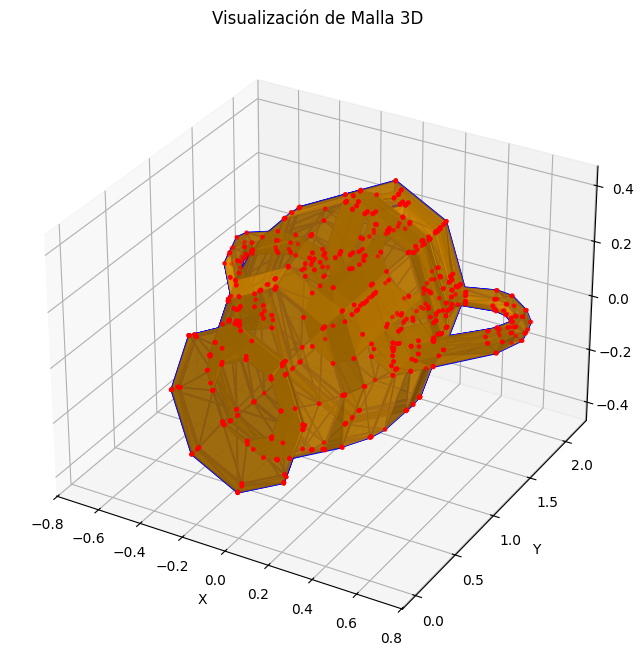

In [16]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

# --- Caras (triángulos) ---
ax.plot_trisurf(
    mesh.vertices[:,0],
    mesh.vertices[:,1],
    mesh.vertices[:,2],
    triangles=mesh.faces,
    color='orange',
    alpha=0.5,
    edgecolor='none'
)

# --- Aristas ---
edges = mesh.edges
for edge in edges:
    pts = mesh.vertices[edge]
    ax.plot(pts[:,0], pts[:,1], pts[:,2], color='blue', linewidth=1.0)

# --- Vértices ---
ax.scatter(
    mesh.vertices[:,0],
    mesh.vertices[:,1],
    mesh.vertices[:,2],
    color='red',
    s=5
)

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Visualización de Malla 3D")

plt.show()